**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

0)	Código contendo as funções definidas para resolver todos os exercícios abaixo. É necessário executar a célula abaixo antes de qualquer outra.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import pi

def generate_empty_kernel(n):
    return np.zeros((n,n))

def generate_gaussian_kernel(kernel_order, sigma):
    #Gera um kernel vazio de tamanho 'kernel_order'x'kernel_order'.
    kernel = generate_empty_kernel(kernel_order)
    
    #Itera pelas linhas e colunas do kernel, aplica a função gaussiana e armazena o valor gerado na respectiva posição do kernel.
    for line_it in range(0, kernel_order):
        for column_it in range(0, kernel_order):
            kernel[line_it][column_it] = (1/(2*pi*(sigma**2)))*np.exp(-((line_it-kernel_order//2)**2 + (column_it-kernel_order//2)**2)/(2*(sigma**2)))
    
    #Retorna o kernel normalizado sob a soma total dos valores deste.
    return kernel / np.sum(kernel)

def convolution(kernel, image):
    #Rotaciona o kernel
    kernel = kernel[::-1, ::-1]
    #Cria uma imagem resultante do mesmo tamanho da imagem original
    result_image = np.zeros((image.shape[0], image.shape[1]))
    #Descobre a quantidade necessária de preenchimento com base na ordem do kernel
    padding = kernel.shape[0]//2
    #Cria uma imagem com preenchimento nas linhas e colunas
    padded_image = np.pad(image, padding);
    
    #Itera pelos pixels da imagem gerada imediatamente acima (ignora o preenchimento) operando a convolução e armazenando o resultado na imagem resultado.
    for line_it in range(padding, padded_image.shape[0]-padding):
        for column_it in range(padding, padded_image.shape[1]-padding):
            initial_line = line_it-(padding)
            initial_column = column_it-(padding)
            final_line = line_it+(padding)
            final_column = column_it+(padding)
            image_slice = padded_image[initial_line:final_line+1, initial_column:final_column+1]
            result_image[line_it-padding][column_it-padding] = np.sum(image_slice*kernel)
    
    return result_image

def median_filter(kernel_order, image):
    #Cria uma imagem resultante do mesmo tamanho da imagem original
    result_image = np.zeros((image.shape[0], image.shape[1]))
    #Descobre a quantidade necessária de preenchimento com base na ordem do kernel
    padding = kernel_order//2
    #Cria uma imagem com preenchimento nas linhas e colunas
    padded_image = np.pad(image, padding);
    
    #Itera pelos pixels da imagem gerada imediatamente acima (ignora o preenchimento) operando a mediana sob a fatia extraida da imagem e armazenando o valor ao meio do conjunto ordenado na imagem resultado.
    for line_it in range(padding, padded_image.shape[0]-padding):
        for column_it in range(padding, padded_image.shape[1]-padding):
            initial_line = line_it-(padding)
            initial_column = column_it-(padding)
            final_line = line_it+(padding)
            final_column = column_it+(padding)
            sorted_image_slice = np.sort(padded_image[initial_line:final_line+1, initial_column:final_column+1])
            result_image[line_it-padding][column_it-padding] = sorted_image_slice[padding][padding]
    
    return result_image

#Por padrão, o filtro de média presumirá que a mascará será preenchida por valores contendo 1/ordem_mascara².
def mean_filter(kernel_order, image):
    kernel = generate_empty_kernel(kernel_order)
    kernel += 1/(kernel_order**2)
    
    return convolution(kernel, image)

def gaussian_filter(kernel_order, sigma, image):
    return convolution(generate_gaussian_kernel(kernel_order, sigma), image)

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

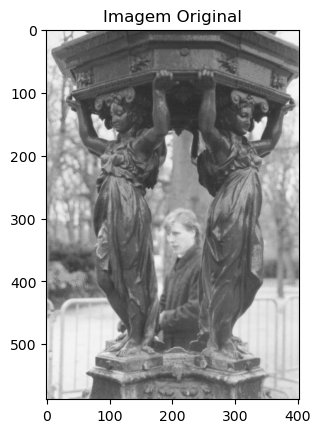

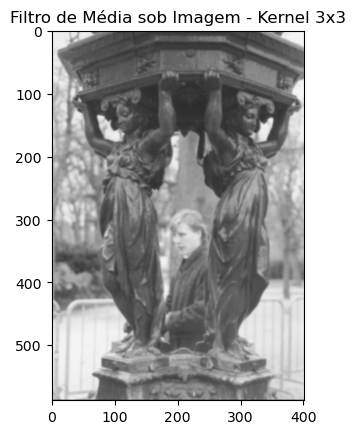

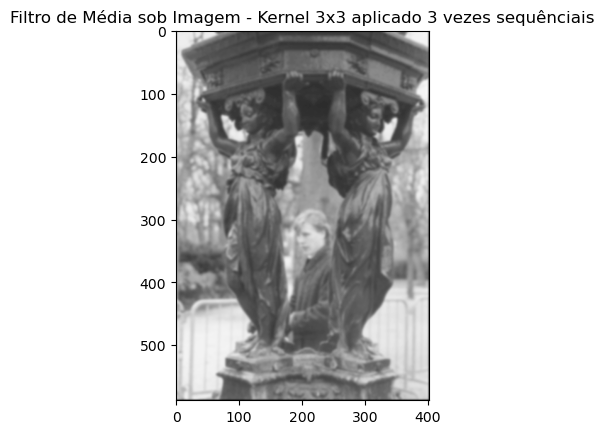

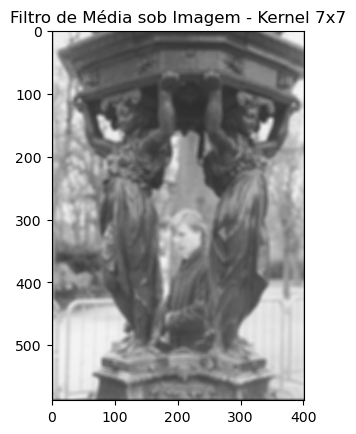

In [2]:
#Lê a imagem original
imagem = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

#Mostra a imagem original.
plt.plot(1, 1, 1)
plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.show()

#Gera uma imagem cujo filtro de média foi aplicado utilizando um kernel 3x3.
imagem_3x3 = mean_filter(3, imagem)

#Mostra a imagem resultado da operação acima.
plt.plot(3, 1, 1)
plt.imshow(imagem_3x3, cmap='gray', vmin=0, vmax=255)
plt.title("Filtro de Média sob Imagem - Kernel 3x3")
plt.show()

#Gera uma imagem cujo filtro de média foi aplicado duas outras vezes sob a imagem gerada anteriormente, totalizando 3 operações de convolução com um kernel 3x3.
imagem_3x3 = mean_filter(3, mean_filter(3, imagem_3x3))

#Mostra a imagem resultado da operação acima.
plt.plot(3, 1, 2)
plt.imshow(imagem_3x3, cmap='gray', vmin=0, vmax=255)
plt.title("Filtro de Média sob Imagem - Kernel 3x3 aplicado 3 vezes sequênciais")
plt.show()

#Gera uma imagem cujo filtro de média foi aplicado utilizando um kernel 7x7.
imagem_7x7 = mean_filter(7, imagem)

#Mostra a imagem resultante da operação acima.
plt.plot(3, 1, 3)
plt.imshow(imagem_7x7, cmap='gray', vmin=0, vmax=255)
plt.title("Filtro de Média sob Imagem - Kernel 7x7")
plt.show()

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

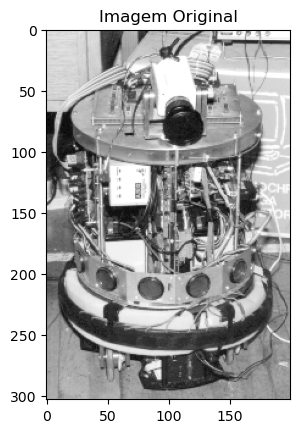

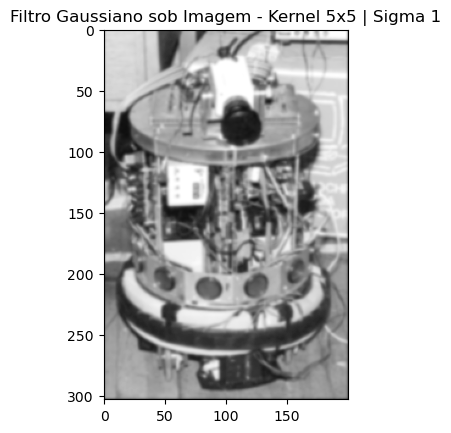

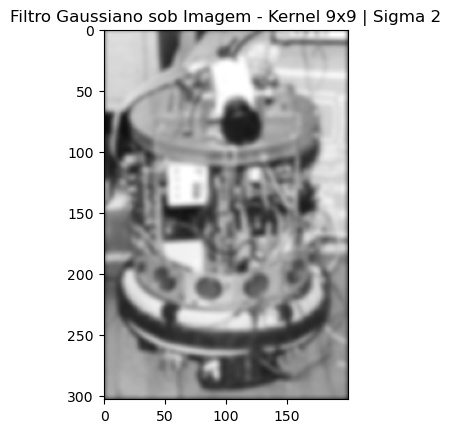

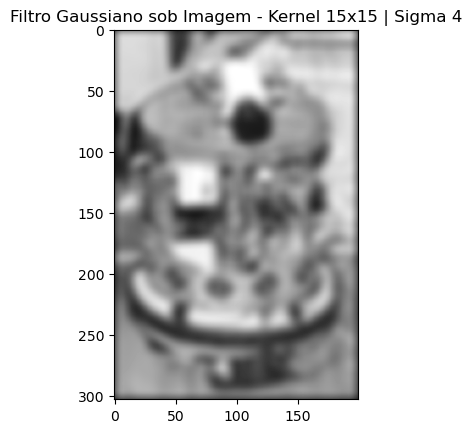

In [3]:
#Lê a imagem original.def rotate_kernel(kernel):
imagem = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

#Mostra a imagem original.
plt.plot(1, 1, 1)
plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.show()

#Gera uma imagem cujo filtro gaussiano foi aplicado utilizando um kernel 5x5 e sigma 1.
imagem_5x5 = gaussian_filter(5, 1, imagem)

#Mostra a imagem resultado da operação acima.
plt.plot(3, 1, 1)
plt.imshow(imagem_5x5, cmap='gray', vmin=0, vmax=255)
plt.title("Filtro Gaussiano sob Imagem - Kernel 5x5 | Sigma 1")
plt.show()

#Gera uma imagem cujo filtro gaussiano foi aplicado utilizando um kernel 9x9 e sigma 2.
imagem_9x9 = gaussian_filter(9, 2, imagem)

#Mostra a imagem resultado da operação acima.
plt.plot(3, 1, 2)
plt.imshow(imagem_9x9, cmap='gray', vmin=0, vmax=255)
plt.title("Filtro Gaussiano sob Imagem - Kernel 9x9 | Sigma 2")
plt.show()


#Gera uma imagem cujo filtro gaussiano foi aplicado utilizando um kernel 15x15 e sigma 4.
imagem_15x15 = gaussian_filter(15, 4, imagem)

#Mostra a imagem resultado da operação acima.
plt.plot(3, 1, 3)
plt.imshow(imagem_15x15, cmap='gray', vmin=0, vmax=255)
plt.title("Filtro Gaussiano sob Imagem - Kernel 15x15 | Sigma 4")
plt.show()

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

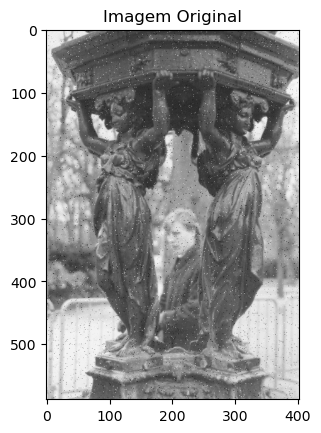

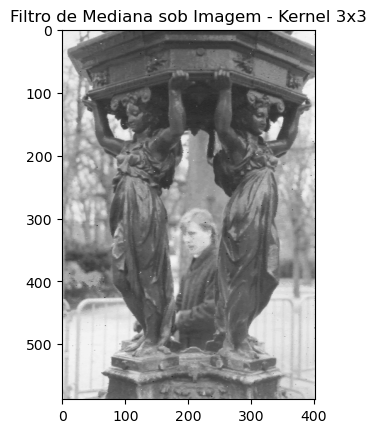

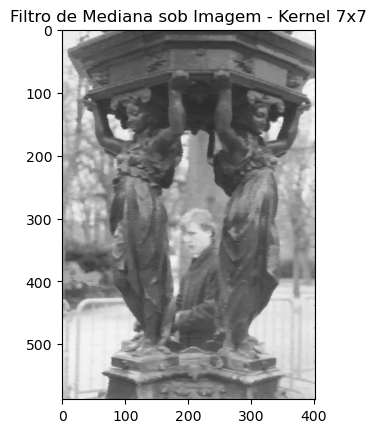

In [4]:
#Lê a imagem original.
imagem = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

#Mostra a imagem original.
plt.plot(1, 1, 1)
plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.show()

#Gera uma imagem cujo filtro de mediana foi aplicado utilizando uma mascara de ordem 3x3.
imagem_3x3 = median_filter(3, imagem)

#Mostra a imagem resultado da operação acima.
plt.plot(2, 1, 1)
plt.imshow(imagem_3x3, cmap='gray', vmin=0, vmax=255)
plt.title("Filtro de Mediana sob Imagem - Kernel 3x3")
plt.show()

#Gera uma imagem cujo filtro de mediana foi aplicado utilizando uma mascara de ordem 3x3.
imagem_7x7 = median_filter(7, imagem)

#Mostra a imagem resultado da operação acima.
plt.plot(2, 1, 2)
plt.imshow(imagem_7x7, cmap='gray', vmin=0, vmax=255)
plt.title("Filtro de Mediana sob Imagem - Kernel 7x7")
plt.show()

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

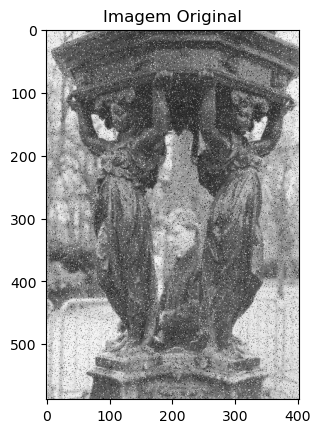

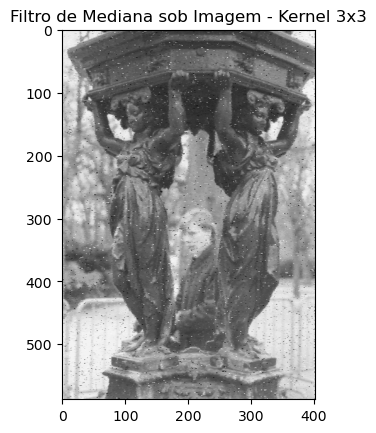

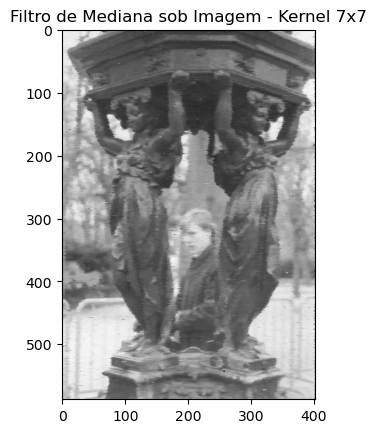

In [5]:
#Lê a imagem original.
imagem = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

#Mostra a imagem original.
plt.plot(1, 1, 1)
plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.show()

#Gera uma imagem cujo filtro de mediana foi aplicado utilizando uma mascara de ordem 3x3.
imagem_3x3 = median_filter(3, imagem)

#Mostra a imagem resultado da operação acima.
plt.plot(2, 1, 1)
plt.imshow(imagem_3x3, cmap='gray', vmin=0, vmax=255)
plt.title("Filtro de Mediana sob Imagem - Kernel 3x3")
plt.show()

#Gera uma imagem cujo filtro de mediana foi aplicado utilizando uma mascara de ordem 3x3.
imagem_7x7 = median_filter(7, imagem)

#Mostra a imagem resultado da operação acima.
plt.plot(2, 1, 2)
plt.imshow(imagem_7x7, cmap='gray', vmin=0, vmax=255)
plt.title("Filtro de Mediana sob Imagem - Kernel 7x7")
plt.show()